In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("Telco Churn.csv")
df[0:5]     # ngasi output dari index 0 sampe 5

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [28]:
df.info()
print("\nJumlah baris dan kolom dari dataset :",df.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


# Missing Values Checking

In [29]:
print(df.isnull().any())

customerID          False
gender              False
SeniorCitizen       False
Partner             False
Dependents          False
tenure              False
PhoneService        False
MultipleLines       False
InternetService     False
OnlineSecurity      False
OnlineBackup        False
DeviceProtection    False
TechSupport         False
StreamingTV         False
StreamingMovies     False
Contract            False
PaperlessBilling    False
PaymentMethod       False
MonthlyCharges      False
TotalCharges        False
Churn               False
dtype: bool


In [30]:
df = df.replace(' ', np.nan)
print(df.isnull().sum())

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64


In [31]:
df = df.fillna(0)
print(df.isnull().sum())

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


# Anomalies and Outlier Handling

In [32]:
convert = {'TotalCharges' : float}
df = df.astype(convert)
print(df.dtypes)

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object


Periksa data apakah sudah terdistribusi normal atau belum

array([[<AxesSubplot: title={'center': 'SeniorCitizen'}>,
        <AxesSubplot: title={'center': 'tenure'}>],
       [<AxesSubplot: title={'center': 'MonthlyCharges'}>,
        <AxesSubplot: title={'center': 'TotalCharges'}>]], dtype=object)

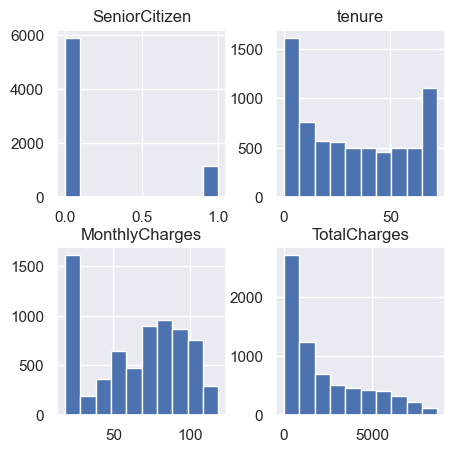

In [33]:
df.hist()

IQR Based Filtering (ketika data terdistribusi miring)

C:\Users\zaida\AppData\Local\Temp\ipykernel_6268\958669267.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['TotalCharges'])


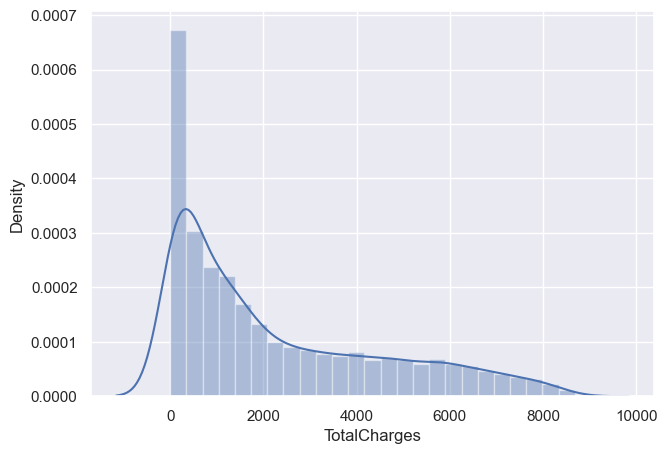

In [43]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(df['TotalCharges'])
plt.show()


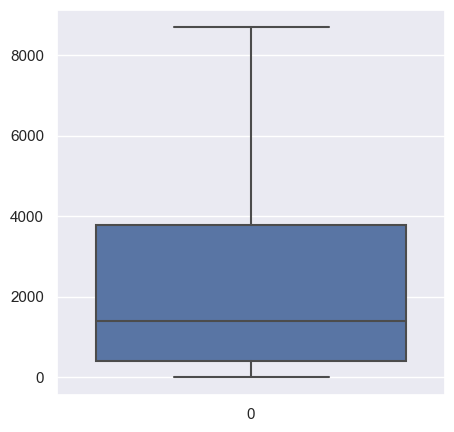

In [35]:
sns.boxplot(df['TotalCharges'])
sns.set(rc={'figure.figsize':(5,5)})

C:\Users\zaida\AppData\Local\Temp\ipykernel_6268\2775437818.py:18: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['TotalCharges'])
C:\Users\zaida\AppData\Local\Temp\ipykernel_6268\2775437818.py:22: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_df['TotalCharges'])
c:\Users\zaida\anaconda3\l

KeyError: 0

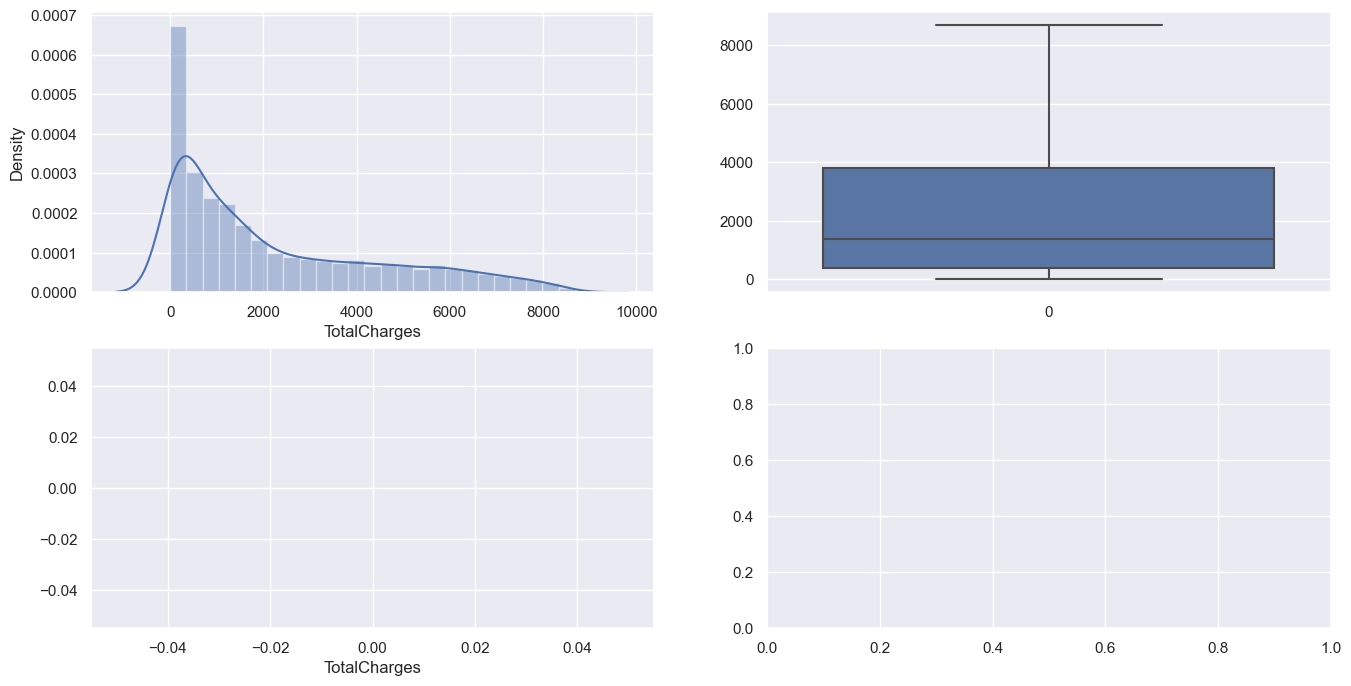

In [36]:
quartile1 = df['TotalCharges'].quantile(0.25)
quartile3 = df['TotalCharges'].quantile(0.75)
iqr = quartile1 - quartile3

# Capping
upper_limit = quartile3 + 1.5 * iqr
lower_limit = quartile1 - 1.5 * iqr

df[df['TotalCharges'] > upper_limit]
df[df['TotalCharges'] < lower_limit]

# Trimming
new_df = df[df['TotalCharges'] < upper_limit]
new_df.shape

plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(df['TotalCharges'])
plt.subplot(2,2,2)
sns.boxplot(df['TotalCharges'])
plt.subplot(2,2,3)
sns.distplot(new_df['TotalCharges'])
plt.subplot(2,2,4)
sns.boxplot(new_df['TotalCharges'])
plt.show()

In [ ]:
new_df_cap = df.copy()
new_df_cap['TotalCharges'] = np.where(
    new_df_cap['TotalCharges'] > upper_limit,
    upper_limit,
    np.where(
        new_df_cap['TotalCharges'] < lower_limit,
        lower_limit,
        new_df_cap['TotalCharges']
    )
)

In [ ]:
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(df['TotalCharges'])
plt.subplot(2,2,2)
sns.boxplot(df['TotalCharges'])
plt.subplot(2,2,3)
sns.distplot(new_df_cap['TotalCharges'])
plt.subplot(2,2,4)
sns.boxplot(new_df_cap['TotalCharges'])
plt.show()
